In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style = 'darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
df = pd.read_csv(r"F:\Krishna\Excel R\Data Scientist\Assignments\SVM\mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [4]:
df.describe(include = object)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,4,9,2,9,4,3,2,12,2,...,9,9,2,4,3,8,9,6,7,2
top,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,enlarging,...,brown,orange,universal,white,one,sheathing,brown,abundant,urban,poisonous
freq,439,568,263,1023,274,540,677,1007,216,1040,...,271,259,1010,553,689,305,255,360,316,1400


In [5]:
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [6]:
df['bruises'].unique()

array(['no', 'yes'], dtype=object)

All the datatypes are correct.

Missing Value Imputation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [10]:
df.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

There are no missing values.

Outlier Detection

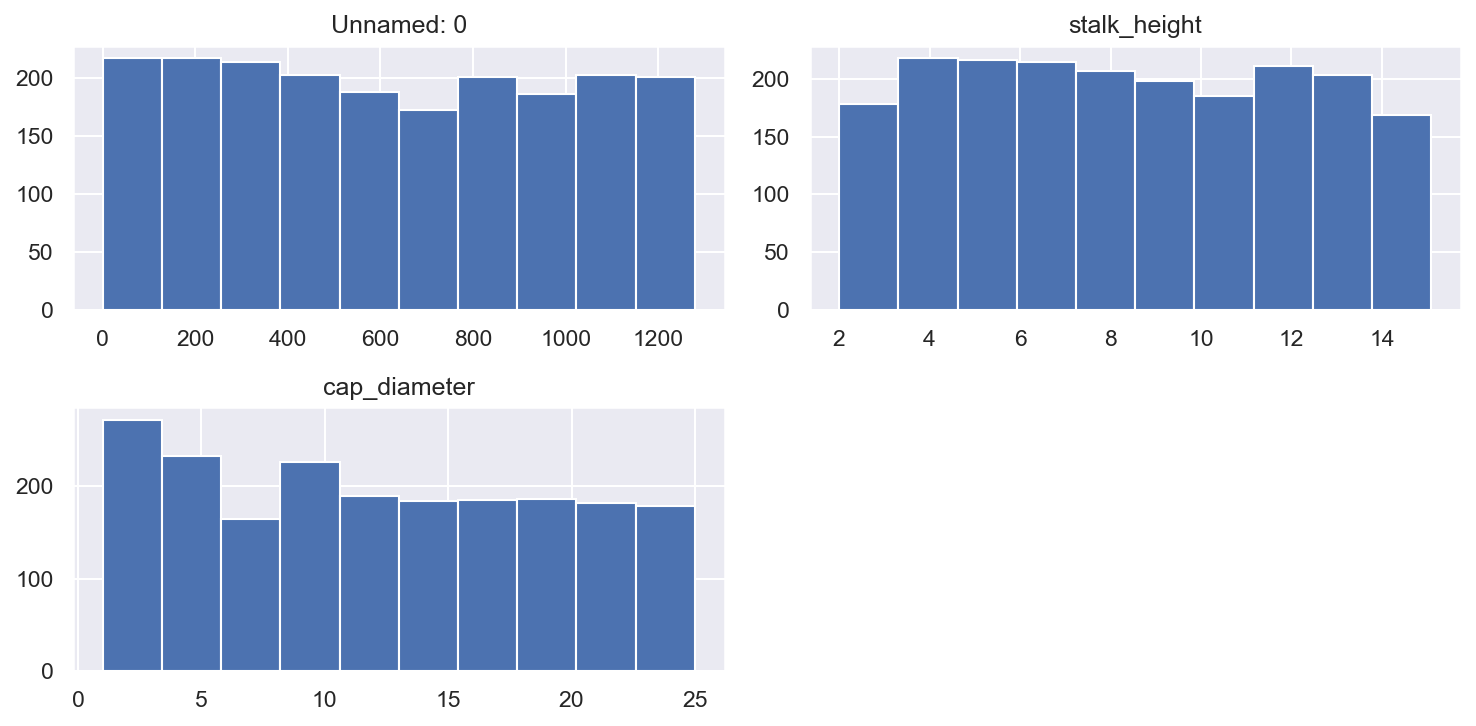

In [11]:
df.hist()
plt.tight_layout()

<Axes: >

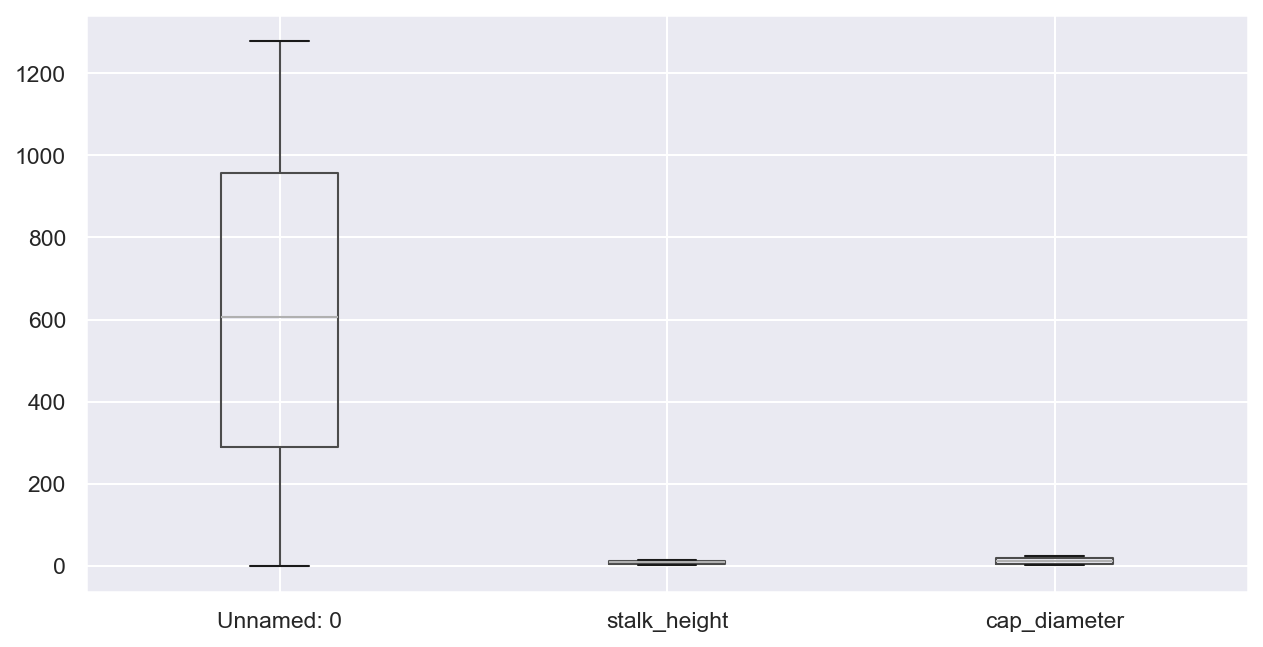

In [12]:
df.boxplot()

No outliers 

Scatterplot and Correlation

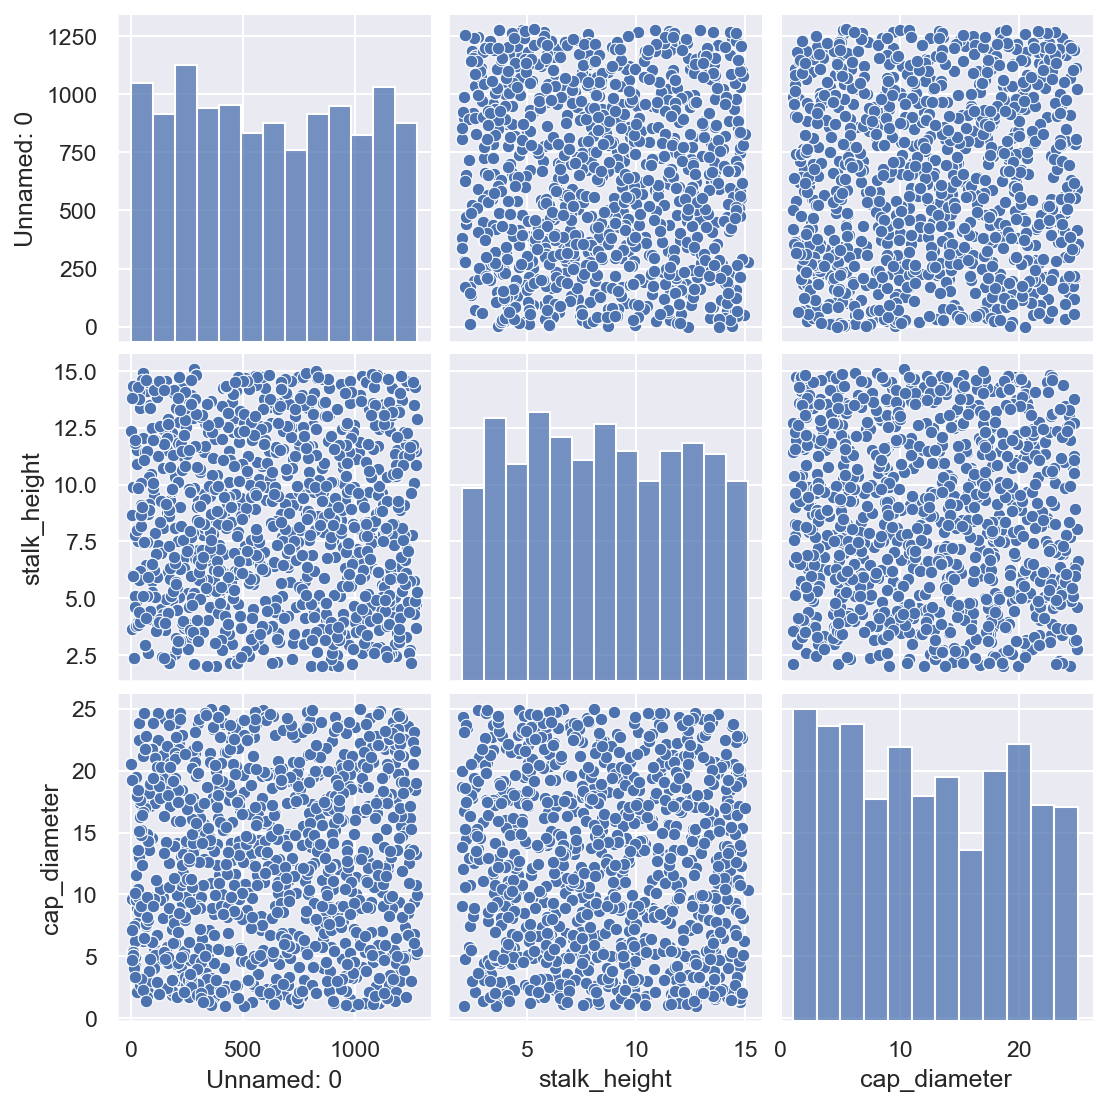

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10444\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.001508,0.051881
stalk_height,-0.001508,1.000000,-0.003486
cap_diameter,0.051881,-0.003486,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10444\3007872909.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'rainbow')


<Axes: >

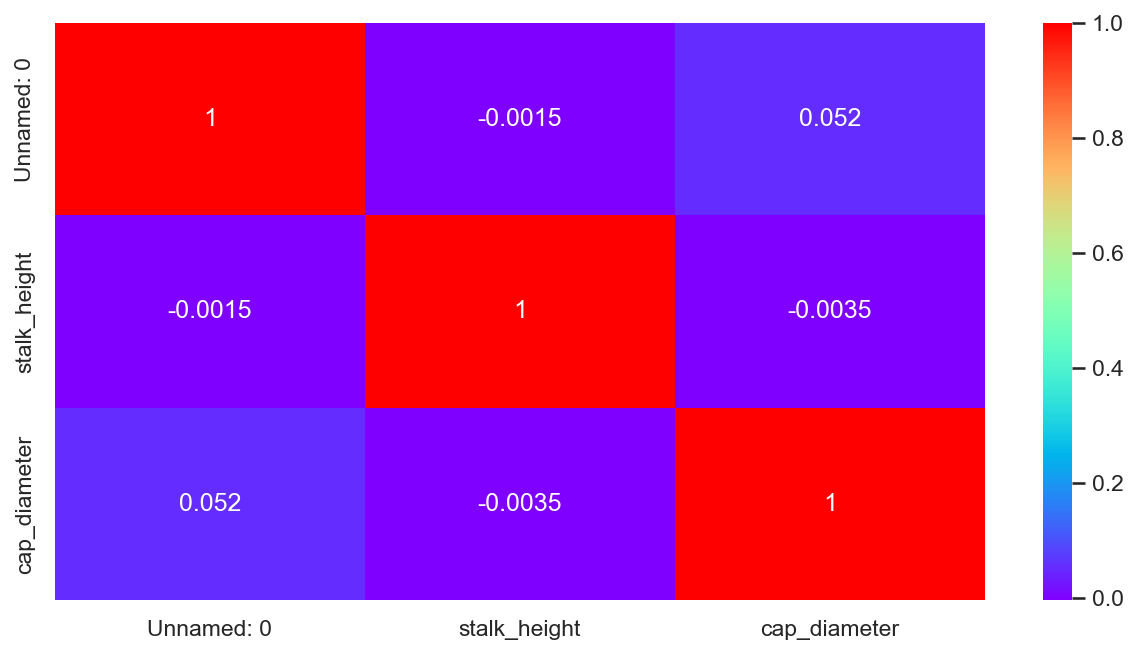

In [16]:
sns.heatmap(df.corr(), annot = True, cmap = 'rainbow')

Encoding

We have so many independent columns to encode.

In [17]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [23]:
oe = OrdinalEncoder()


In [26]:
cat_cols = df.drop(columns = ['class']).select_dtypes(object).columns
cat_cols

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [27]:
df[cat_cols]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,scaly,gray,white,universal,white,none,none,yellow,clustered,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,silky,pink,orange,partial,orange,one,flaring,purple,abundant,leaves
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,fibrous,pink,orange,partial,white,one,zone,yellow,numerous,waste
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,silky,brown,red,partial,brown,two,evanescent,yellow,abundant,woods
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,fibrous,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods


In [28]:
df[cat_cols] = oe.fit_transform(df[cat_cols])
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,...,0.0,0.0,2.0,6.0,3.0,1.0,5.0,poisonous,14.276173,5.054983
1,1037,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,...,1.0,0.0,2.0,6.0,1.0,2.0,5.0,edible,3.952715,19.068319
2,309,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,...,1.0,3.0,2.0,6.0,6.0,0.0,5.0,poisonous,9.054265,7.205884
3,282,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,poisonous,5.226499,20.932692
4,820,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,...,1.0,2.0,0.0,4.0,8.0,1.0,4.0,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,...,0.0,1.0,1.0,2.0,6.0,0.0,1.0,poisonous,5.877891,17.464145
1996,1160,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,...,0.0,2.0,1.0,7.0,8.0,2.0,5.0,poisonous,6.500840,13.501957
1997,265,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,...,0.0,0.0,2.0,1.0,8.0,0.0,6.0,poisonous,13.558064,11.270020
1998,411,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,...,1.0,3.0,1.0,0.0,1.0,5.0,6.0,poisonous,11.092703,8.423199


In [29]:
le = LabelEncoder()

In [30]:
df['class'] = le.fit_transform(df['class'])
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,...,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1,14.276173,5.054983
1,1037,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,...,1.0,0.0,2.0,6.0,1.0,2.0,5.0,0,3.952715,19.068319
2,309,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,...,1.0,3.0,2.0,6.0,6.0,0.0,5.0,1,9.054265,7.205884
3,282,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,1,5.226499,20.932692
4,820,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,...,1.0,2.0,0.0,4.0,8.0,1.0,4.0,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,...,0.0,1.0,1.0,2.0,6.0,0.0,1.0,1,5.877891,17.464145
1996,1160,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,...,0.0,2.0,1.0,7.0,8.0,2.0,5.0,1,6.500840,13.501957
1997,265,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,...,0.0,0.0,2.0,1.0,8.0,0.0,6.0,1,13.558064,11.270020
1998,411,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,...,1.0,3.0,1.0,0.0,1.0,5.0,6.0,1,11.092703,8.423199


If we keep the unnamed column, the algorithm will be disctracted towards it instead of its minimal or none effect. So, we will simply remove the unnamed column.

In [31]:
df = df.drop(columns = ['Unnamed: 0'])
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1,14.276173,5.054983
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,1.0,0.0,2.0,6.0,1.0,2.0,5.0,0,3.952715,19.068319
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,1.0,3.0,2.0,6.0,6.0,0.0,5.0,1,9.054265,7.205884
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,1,5.226499,20.932692
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,1.0,2.0,0.0,4.0,8.0,1.0,4.0,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,1.0,...,0.0,1.0,1.0,2.0,6.0,0.0,1.0,1,5.877891,17.464145
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,0.0,2.0,1.0,7.0,8.0,2.0,5.0,1,6.500840,13.501957
1997,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,1.0,...,0.0,0.0,2.0,1.0,8.0,0.0,6.0,1,13.558064,11.270020
1998,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,0.0,...,1.0,3.0,1.0,0.0,1.0,5.0,6.0,1,11.092703,8.423199


Scaling

In [37]:
x = df.drop(columns = ['class'])
x

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0,14.276173,5.054983
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,2.0,6.0,1.0,2.0,5.0,3.952715,19.068319
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,3.0,1.0,3.0,2.0,6.0,6.0,0.0,5.0,9.054265,7.205884
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,5.0,0.0,3.0,2.0,0.0,4.0,1.0,0.0,5.226499,20.932692
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,7.0,1.0,2.0,0.0,4.0,8.0,1.0,4.0,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,1.0,...,4.0,0.0,1.0,1.0,2.0,6.0,0.0,1.0,5.877891,17.464145
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,4.0,0.0,2.0,1.0,7.0,8.0,2.0,5.0,6.500840,13.501957
1997,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,1.0,...,6.0,0.0,0.0,2.0,1.0,8.0,0.0,6.0,13.558064,11.270020
1998,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,0.0,...,5.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0,11.092703,8.423199


In [35]:
y = df['class']
y

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

Scaling

In [39]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns = x.columns)
x

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1.356643,0.398424,1.194966,-1.023271,-1.175776,-0.498601,1.213339,-1.007025,0.487617,1.040833,...,1.503079,-1.010051,-1.302350,1.246952,1.062902,-0.345783,-0.841884,0.979166,1.576459,-1.030123
1,1.356643,-1.396280,0.814161,-1.023271,-1.175776,1.277359,-0.007938,0.993024,-0.693054,-0.960769,...,-1.572275,0.990050,-1.302350,1.246952,1.062902,-1.109522,-0.264460,0.979166,-1.216463,0.958407
2,0.660035,-0.498928,0.433356,0.977259,0.004524,-0.498601,-0.007938,-1.007025,0.782785,1.040833,...,-0.419017,0.990050,1.381985,1.246952,1.062902,0.799826,-1.419308,0.979166,0.163717,-0.724904
3,-1.429786,0.398424,0.052551,0.977259,-0.388909,1.277359,-1.229216,-1.007025,0.192449,-0.960769,...,0.349822,-1.010051,1.381985,1.246952,-1.552935,0.036087,-0.841884,-1.557533,-0.871852,1.222967
4,0.660035,1.295777,1.575772,0.977259,0.397958,0.389379,-0.007938,0.993024,0.192449,-0.960769,...,1.118660,0.990050,0.487207,-1.223483,0.190956,1.563564,-0.841884,0.471826,1.511897,0.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.356643,0.398424,-1.470669,0.977259,0.004524,-1.386580,-0.007938,0.993024,-0.693054,1.040833,...,-0.034598,-1.010051,-0.407571,0.011735,-0.680990,0.799826,-1.419308,-1.050193,-0.695623,0.730771
1996,1.356643,0.398424,0.433356,0.977259,0.397958,-1.386580,1.213339,0.993024,1.077953,1.040833,...,-0.034598,-1.010051,0.487207,0.011735,1.498875,1.563564,-0.264460,0.979166,-0.527090,0.168525
1997,-0.036572,-0.498928,-0.328254,0.977259,-0.388909,1.277359,-1.229216,0.993024,0.487617,1.040833,...,0.734241,-1.010051,-1.302350,1.246952,-1.116962,1.563564,-1.419308,1.486505,1.382181,-0.148193
1998,-1.429786,1.295777,1.194966,-1.023271,1.184825,0.389379,-1.229216,0.993024,0.192449,-0.960769,...,0.349822,0.990050,1.381985,0.011735,-1.552935,-1.109522,1.467811,1.486505,0.715199,-0.552164


Now our data is ready to build the model.

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [41]:
xtrain

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1.356643,0.398424,1.194966,-1.023271,-1.175776,-0.498601,1.213339,-1.007025,0.487617,1.040833,...,1.503079,-1.010051,-1.302350,1.246952,1.062902,-0.345783,-0.841884,0.979166,1.576459,-1.030123
816,-0.733179,-1.396280,-1.470669,-1.023271,0.004524,1.277359,1.213339,0.993024,1.668288,1.040833,...,-0.803436,-1.010051,1.381985,0.011735,0.190956,0.417956,0.890387,0.471826,-0.597292,-0.556676
790,-0.733179,-1.396280,-0.709059,-1.023271,-0.388909,-1.386580,1.213339,-1.007025,-0.693054,1.040833,...,1.118660,0.990050,0.487207,1.246952,-0.680990,-0.727652,-0.264460,1.486505,-0.764822,1.475010
361,-0.733179,0.398424,0.433356,-1.023271,-0.388909,-0.498601,-1.229216,0.993024,-0.693054,1.040833,...,-0.419017,0.990050,-1.302350,0.011735,1.498875,1.563564,1.467811,-0.035514,1.422644,-0.196261
592,0.660035,-1.396280,0.814161,0.977259,0.004524,0.389379,-1.229216,-1.007025,1.668288,-0.960769,...,-1.187855,0.990050,-0.407571,0.011735,-0.680990,0.036087,-0.264460,-1.050193,1.652776,1.053915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,-1.429786,-1.396280,1.194966,-1.023271,0.004524,1.277359,-1.229216,-1.007025,-0.988222,-0.960769,...,0.734241,-1.010051,0.487207,-1.223483,-0.680990,0.036087,0.312964,-1.050193,-1.634610,-0.959865
1096,-1.429786,0.398424,0.814161,0.977259,-0.388909,0.389379,-0.007938,0.993024,1.668288,-0.960769,...,-0.034598,-1.010051,-1.302350,1.246952,0.626929,0.799826,0.312964,-1.050193,-0.606914,-0.087088
1932,-0.036572,-0.498928,0.814161,-1.023271,1.184825,1.277359,-0.007938,-1.007025,-0.988222,1.040833,...,0.349822,0.990050,-1.302350,-1.223483,1.062902,0.036087,-1.419308,-1.050193,-1.436306,1.779104
235,-0.036572,-1.396280,1.575772,0.977259,1.578259,1.277359,-1.229216,-1.007025,-1.578557,-0.960769,...,-1.187855,0.990050,0.487207,0.011735,0.626929,0.036087,0.890387,0.471826,1.338875,-1.021641


In [42]:
ytrain

0       1
816     1
790     1
361     0
592     1
       ..
1791    0
1096    0
1932    0
235     0
1061    1
Name: class, Length: 1600, dtype: int32

In [43]:
xtest

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
674,-0.733179,1.295777,1.194966,0.977259,-1.175776,1.277359,-0.007938,-1.007025,0.782785,-0.960769,...,-0.803436,0.990050,0.487207,0.011735,-1.116962,-1.109522,-0.841884,-1.557533,0.781103,1.400674
1699,1.356643,0.398424,-0.709059,0.977259,0.004524,0.389379,1.213339,0.993024,-0.988222,1.040833,...,0.349822,-1.010051,0.487207,0.011735,-0.680990,1.181695,-1.419308,-0.542854,-0.054311,0.716540
1282,1.356643,-0.498928,-1.470669,-1.023271,1.184825,-0.498601,-1.229216,0.993024,-0.102718,-0.960769,...,-0.034598,0.990050,-1.302350,-1.223483,0.190956,-1.491391,0.890387,0.979166,-0.803591,-1.448536
1315,0.660035,-0.498928,0.433356,0.977259,0.397958,-1.386580,-0.007938,0.993024,-1.578557,-0.960769,...,1.118660,0.990050,-1.302350,0.011735,1.062902,-0.727652,-1.419308,-1.050193,1.085440,1.382213
1210,1.356643,0.398424,0.814161,0.977259,-1.175776,1.277359,-1.229216,0.993024,1.668288,-0.960769,...,1.503079,-1.010051,-1.302350,0.011735,1.498875,1.563564,-0.264460,-1.050193,0.084609,-0.665342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.356643,0.398424,-1.470669,0.977259,-1.175776,1.277359,1.213339,0.993024,-1.283389,1.040833,...,1.118660,0.990050,1.381985,0.011735,-0.680990,1.563564,1.467811,1.486505,1.052494,1.136490
763,0.660035,-1.396280,1.575772,-1.023271,0.397958,-1.386580,-1.229216,0.993024,0.192449,-0.960769,...,0.349822,-1.010051,-0.407571,1.246952,-0.245017,1.181695,-1.419308,-1.557533,-0.303393,-0.194909
385,1.356643,-1.396280,1.575772,-1.023271,-0.388909,-0.498601,1.213339,-1.007025,-0.102718,-0.960769,...,0.734241,0.990050,1.381985,0.011735,-1.552935,-0.727652,-0.841884,0.979166,-0.262495,-0.831379
1667,-0.733179,1.295777,1.575772,0.977259,-0.782343,-0.498601,1.213339,0.993024,-1.283389,-0.960769,...,-1.187855,-1.010051,0.487207,-1.223483,-0.680990,0.417956,1.467811,-1.050193,1.042358,-1.583451


In [44]:
ytest

674     0
1699    1
1282    1
1315    1
1210    1
       ..
400     1
763     1
385     1
1667    1
1820    1
Name: class, Length: 400, dtype: int32

In [45]:
svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain, ytrain))
print(svc.score(xtest, ytest))

0.87375
0.795


It's giving us somewhat good accuracy but not a generalized model bcz for that we have to give ideal value for kernel via Hyper Parameter Tuning. So, let's do it.

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']}

In [48]:
grid = GridSearchCV(SVC(), param_grid = param, verbose = 1)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [49]:
grid.best_params_

{'kernel': 'poly'}

We got the best parameter , now will create final model with kernel = poly.

In [50]:
svc = SVC(kernel = 'poly')
svc.fit(xtrain, ytrain)
yp = svc.predict(xtest)
print(svc.score(xtrain, ytrain))
print(svc.score(xtest, ytest))
print(classification_report(ytest, yp))

0.93125
0.8325
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       124
           1       0.82      0.97      0.89       276

    accuracy                           0.83       400
   macro avg       0.86      0.75      0.77       400
weighted avg       0.84      0.83      0.82       400



Using 'poly' as Kernel, our accuracy have increased drastically, but we still have got a generalized model only, so let's try other values for kernel.

In [56]:
svc = SVC(kernel = 'linear')
svc.fit(xtrain, ytrain)
yp = svc.predict(xtest)
print(svc.score(xtrain, ytrain))
print(svc.score(xtest, ytest))
print(classification_report(ytest, yp))

0.7025
0.69
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.69      1.00      0.82       276

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.48      0.69      0.56       400



G:\Users\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Users\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Users\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For Linear as Kernel, The accuracy for both training and testing data have decreased for sure but at the end we are getting a Generalized model. 